# P2. Exploratory Analysis
## Titanic dataset
In this analysis, we take a look at the Titanic data set. Through this analysis, we would like to find out more information about the passengers traveling on this tragic boat. 

## 1. Read in data

In [34]:
#import libraries and read in data
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns
mp.style.use('ggplot') 

titanic=pd.read_csv('titanic-data.csv')
titanic.df=pd.DataFrame(titanic,columns=['PassengerID','Survived','Pclass','Name','Sex','Age','Sibsp','Parch','Ticket','Fare','Cabin','Embarked'])

### Questions we would like to answer with this analysis: What factor is correlated to a passenger's survival rate? Will gender and age associated with a passenger's chance of survival?

## 2. Data Wangling and Cleaning

Fist we take a look at the dataset:

In [35]:
titanic.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [36]:
titanic.tail(5)

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

From looking at the dataset, we can see that PassengerId, Age, and Fare are continuous variables.  Survived is a binary variable while Pclass is a categorical variables. SibSp and Parch are discrete variables.

Name, Sex, and Embarked are string. Ticket and Cabin are alphanumeric variables.

We can use the dtypes command in Python to check these variable types.

In [37]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Next, we would like to conver Sex to a binary variable named Gender:

In [38]:
titanic['Gender']=np.where(titanic.Sex=='male',0,1)
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Gender  
0      0         A/5 21171   7.2500   NaN        S       0  
1      0          PC 17599  71.2833   C85        C       1  
2      0  STON/O2. 3101282   7.9250   NaN        S       1  
3      0            113803  53.1000  C123        S       1  
4      0            373450   8.0500   NaN        S       0

When looking at the table, we can find some 'NaN's in Age and Cabin. How many missing enties for these two variables? 

In [39]:
titanic.Age.isnull().sum()

177

In [40]:
titanic.Cabin.isnull().sum()

687

Now we know that there are 177 missing for Age and 687 missing for Cabin. Since we are not interested in passenger's cabin number, we will drop this variable from the dataset. 

As for Age, there are a couple of ways to handle the missing data situation: 

1. Remove the passengers with missing Age information;

2. Analyze data using available ones(ignore missing values);

3. Impute missing data.

The drawback of 1st solution is that we will probably lose 177 passengers from the dataset. Now we have 891 passengers in the file so losing some sample may not be an issue but this would not be wise if we have a small sample; Since non of other variables have missing data, we would ignore the missing values in age and conduct the analysis when age is involved.

In [41]:
del titanic["Cabin"]
titanic.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Gender  
0      0         A/5 21171   7.2500        S       0  
1      0          PC 17599  71.2833        C       1  
2      0  STON/O2. 3101282   7.9250        S       1  
3      0            113803  53.1000        S       1  
4      0            373450   8.0500        S       0

## 3. Data Analysis

### 3.1 Gender and Survival

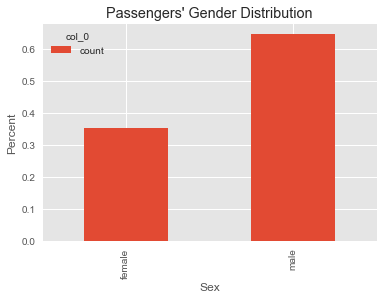

In [42]:
### Gender of passengers
tab=pd.crosstab(index=titanic.Sex, columns='count').apply(lambda c: c/c.sum(), axis=0)
fig=tab.plot(kind='bar')
mp.title("Passengers' Gender Distribution")
fig.set_ylabel("Percent")

From the chart, we can see that 65% of the passengers on board are male while female is only about 35% of the passengers.

How about the survival rate by gender?

In [43]:
pd.crosstab(titanic.Survived, titanic.Sex).apply(lambda c: c/c.sum(), axis=0)

Sex         female      male
Survived                    
0         0.257962  0.811092
1         0.742038  0.188908

This table shows that although 35.24% of the passengers in this dataset is female, 74.2% of them survived. For male, the survival rate is only 18.9%. Thus, passenger's gender do have some correlation with survival.

### 3.2 Survived passengers' age distribution

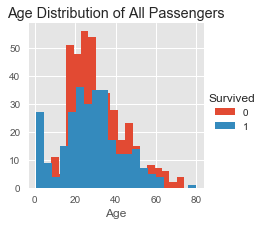

In [44]:
### Age Distribution of all passengers 
fig = sns.FacetGrid(titanic, hue="Survived")
fig.map(mp.hist, 'Age', bins=20)
mp.title('Age Distribution of All Passengers')
fig.add_legend()

We can see that the majority of the passengers are young adults age from 20s to 30s. Almost all infant(0-2 years olds) survived and about half of the young adutls(20-30 years olds) survived.  

In [45]:
##### Mean age for survived passengers
survived=titanic.loc[titanic.loc[:,'Survived']==1,:]
survived.loc[:,'Age'].mean()

28.343689655172415

In [46]:
##### Mean age of non-survived passengers
non_survived=titanic.df.loc[titanic.df.loc[:,'Survived']==0,:]
non_survived.loc[:,'Age'].mean()

30.62617924528302

Here we see that the average age of survived passengers are smaller than that of non-survived passengers. 

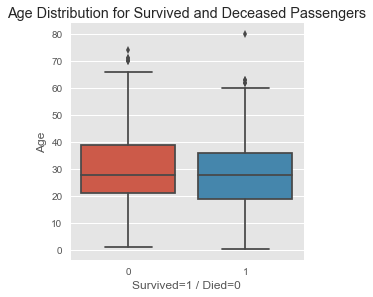

In [47]:
fig=sns.factorplot(y="Age", x="Survived", data=titanic, kind="box")
fig.set(xlabel="Survived=1 / Died=0",ylabel="Age")
mp.title("Age Distribution for Survived and Deceased Passengers")

The boxplot shows that the age range for non-survived passengers are from 0 to around 68 years old while that for survived passengers are from 0 to 60 year old. In addition, the plot also shows some age outliers for both groups.


Next we plot the histogram of age distribution by survival and see if the distributions may be different.

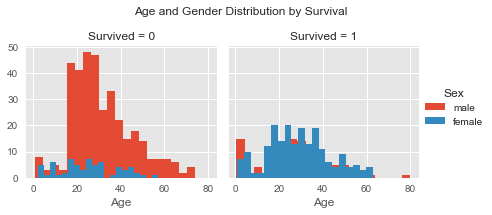

In [48]:
fig = sns.FacetGrid(titanic, col='Survived',hue="Sex")
fig.map(mp.hist, 'Age', bins=20)
mp.subplots_adjust(top=0.8)
fig.fig.suptitle('Age and Gender Distribution by Survival')
fig.add_legend()
                 

From this histogram, we can see that the majority of non-survived passengers are male 18-30 years olds. Most children 0-5 years old survived. In addition, the majority of survived passengers are female across all age groups.

### 3.3 Survived Passenger and cabin class

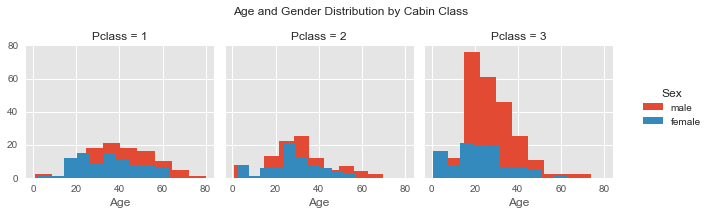

In [49]:
### Passengers by cabin class
fig = sns.FacetGrid(titanic, col='Pclass',hue="Sex",margin_titles=True)
fig.map(mp.hist, 'Age')
mp.subplots_adjust(top=0.8)
fig.fig.suptitle('Age and Gender Distribution by Cabin Class')
fig.add_legend()

This chart shows that while male and female passengers in 1st and 2nd class are about half-half but male passengers ages between 20-30 are the majority of 3rd class.

In [50]:
pd.crosstab(titanic.Survived, titanic.Pclass).apply(lambda c: c/c.sum(), axis=0)

Pclass          1         2         3
Survived                             
0         0.37037  0.527174  0.757637
1         0.62963  0.472826  0.242363

For the above cross table between Survived and Pclass, we calculate the percent of passengers survived by their class. We can see that the majority of 3rd class passengers (75.8%) did not survive while 62.9% of 1st class passengers survived. From this table, we can see that there is a correlation of cabin class with passengers' chance of survival.

## 4. Hypothesis Testing

### 4.1. Test 1: Age and Survival

We are interested in whether the average age between survived and deceased group are the same. Here we use two sample t-test to examine our hypothesis:

$H_0$: The mean age for survived and non-survived passengers are the same.

$H_a$: The mean age for survived and non-survived passengers are not the same.

Translate to mathematical representation:

$H_0$: $\mu_{survived} = \mu_{died}$

$H_a$: $\mu_{survived} \neq \mu_{died}$

Where $\mu_{survived}$ is the population mean age for survived group and $\mu_{died}$ is the population population mean age for non-survived group.

In [51]:
titanic.Age.groupby(titanic['Survived']).describe()

Survived       
0         count    424.000000
          mean      30.626179
          std       14.172110
          min        1.000000
          25%       21.000000
          50%       28.000000
          75%       39.000000
          max       74.000000
1         count    290.000000
          mean      28.343690
          std       14.950952
          min        0.420000
          25%       19.000000
          50%       28.000000
          75%       36.000000
          max       80.000000
Name: Age, dtype: float64

The T statistic is calculated as follows:
$T = \frac{\bar{x_1}-\bar{x_2}}{\sqrt{\frac{SD^2}{n_1}}+\sqrt{\frac{SD^2}{n_2}}} = \frac{30.626-28.343}{\sqrt{\frac{14.17^2}{424}}+\sqrt{\frac{14.95^2}{290}}} = \frac{2.283}{\sqrt{0.4736}+\sqrt{0.7707}} = 1.458$ 

With degress of freedom: $424+290-2 = 712$

We reject the null hypothesis if T*>1.96 or T*<-1.96.

Since the test statistic is smaller than 1.96, then we accept the null hypothesis that there is no difference of the average age between survived and non-survived passengers.

### 4.2 Test 2: Pclass and Survival

We are interested in the correlation between cabin class and survival. Here we use contingency table and Chi-square test for testing:

$H_0$: Pclass is independent with survival.

$H_a$: Pclass is not independent with survival.

Translate to mathematical expressions:
$H_0$: $\pi_{1,j} = \pi_{2,j}$ for j=1,2,3

$H_a$: at least one set(cabin) of survival rates are not equal

where $\pi_{1,j}$ is the proportion of passengers not survived for j class while $\pi_{2,j}$ is the proportion of passengers survived for j class.

Next, we print out the contingency table by Pclass and Survived:

In [52]:
pd.crosstab(titanic.Survived, titanic.Pclass,margins=True)

Pclass      1    2    3  All
Survived                    
0          80   97  372  549
1         136   87  119  342
All       216  184  491  891

First we calculate the expected values for each cell:


| | 1  |  2 | 3  |   
|---|---|---|---|---|
| 0  |133.09   | 113.37  |302.54   |
| 1  |82.91   | 70.63  | 188.46  | 


The $\chi^2$ statistic is calculated as follows:
$\chi^2 = \frac{(80-133.09)^2}{133.09}+\frac{(97-113.37)^2}{113.37}+\frac{(372-302.54)^2}{302.54}+\frac{(136-82.91)^2}{82.91}+\frac{(87-70.63)^2}{70.63}+\frac{(119-188.46)^2}{188.46}=102.52 $

with 4 degrees of freedom.

Rejection the null hypothesis when $\chi^2$ > $\chi^2_{0.95,4}$ = 9.49.
Since the calculated $\chi^2$ statistic is 102.52, we reject the null hypothesis and conclude that Survival and Pclass are correlated.

## 5. Conclusions

From the above analysis, we first explored the correlation of gender, age and class with survival using tables and plots. We have seen that the survived passengers are mostly female passengers across all age groups. In addition, when checking correlation of class and survival, we noted that the survival rate of 1st class is 63% and 2nd class is 47% while 3rd class is only 24%. Since the majority of passengers are in 3rd class, then we can see that the survival rate is definitely not equal across class. Later with the aid of contingency table and chi-square test, we conclude that class has a correlation with survival.   

However, when testing the average age of survived and deceased group, we have not enough evidence to conclude that the average age between survived and deceased groups are different. This conclusion is a little different from what we are seeing in exploration phase. With the t-test, we can only test if the average age of two groups are different. Nevertheless, it can also be possible that the chance of survival becomes bigger when a passenger's age is younger. As previous boxplot shows, the age range of non-survived group is wider compared to that of survived group and this could have some influence on the group average.  

For future analysis, we can try to model the chance of survival by passengers' characters using logistic regression. Building a predictive model enables us to calculate the chance of survival given a set of passenger's age, gender, class, etc. We can also use a test sample to test out the model to better refine the model. 